SVM
Feature Extraction Method: GLCM
Features Taken with distance = 1,3,5, angle = 0,45,90,135,180,225,270,315) (total 120 features)
with PCA Grid Search

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/"MyDrive/Machine Learning/GLCM_Features"

/content/drive/MyDrive/Machine Learning/GLCM_Features


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import glob
import cv2
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from skimage.filters import sobel
from skimage.feature import greycomatrix, greycoprops
import time
import seaborn as sns

In [ ]:
X_train = list()
X_test = list()
y_train = list()
y_test = list()

# for k fold cross validation
x_new = list()
y_new = list()

In [ ]:
# 0 = crazing 
# 1 = inclusion
# 2 = patches
# 3 = pitted_surface
# 4 = rolled in scale
# 5 = scratches

In [ ]:
dataset1 = pd.read_csv('GLCM_train.csv')
print(dataset1)

      Unnamed: 0   Energy0     Corr0  Diss_sim0  Homogen0   Contrast0  \
0              0  0.014224  0.725731  15.456080  0.063373  383.715930   
1              0  0.015558  0.778272  12.804573  0.076365  263.964171   
2              0  0.015120  0.746263  13.894296  0.069790  310.096910   
3              0  0.016114  0.719193  13.510452  0.071717  292.011709   
4              0  0.013543  0.787991  14.764347  0.066498  351.571382   
...          ...       ...       ...        ...       ...         ...   
1435           0  0.033905  0.971425   3.316633  0.292426   22.962261   
1436           0  0.058558  0.959366   2.681734  0.485881   48.285804   
1437           0  0.047101  0.983943   2.665603  0.434930   30.869422   
1438           0  0.052825  0.987204   3.837789  0.358781   61.731910   
1439           0  0.052105  0.966701   3.046206  0.392387   38.874296   

       Energy1     Corr1  Diss_sim1  Homogen1  ...  Energy22    Corr22  \
0     0.013450  0.616408  18.258428  0.054306  ..

In [ ]:
dataset1.describe()

,Unnamed: 0,Energy0,Corr0,Diss_sim0,Homogen0,Contrast0,Energy1,Corr1,Diss_sim1,Homogen1,...,Energy22,Corr22,Diss_sim22,Homogen22,Contrast22,Energy23,Corr23,Diss_sim23,Homogen23,Contrast23
count,1440.0,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,...,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,0.0,0.039076,0.914974,6.997952,0.227607,121.605174,0.036137,0.876810,8.314382,0.195434,...,0.032516,0.772890,11.269470,0.157613,316.573793,0.030477,0.711276,12.690073,0.138156,399.945973
std,0.0,0.031993,0.073490,4.495580,0.143985,123.116106,0.030687,0.108568,5.206155,0.123702,...,0.028739,0.210032,7.254543,0.107482,325.639194,0.027271,0.203431,7.335945,0.088290,373.605586
min,0.0,0.010988,0.667458,0.750251,0.059618,1.303920,0.010379,0.562416,1.171486,0.050095,...,0.009259,0.206686,1.393538,0.035860,3.437795,0.009004,0.146048,1.785064,0.033643,6.240551
25%,0.0,0.017849,0.873547,2.855704,0.104752,19.534177,0.016751,0.807872,3.437382,0.092006,...,0.014914,0.626166,4.306244,0.070809,41.410128,0.014451,0.567816,6.164072,0.066144,99.654688
50%,0.0,0.028030,0.944733,6.217249,0.163017,70.343480,0.025727,0.925800,7.613924,0.139287,...,0.022618,0.873883,10.672500,0.108209,210.457744,0.022242,0.776509,11.322847,0.103373,257.521658
75%,0.0,0.053751,0.971263,10.763901,0.342913,205.148222,0.048970,0.961424,12.498498,0.293971,...,0.043850,0.939595,16.978769,0.243213,509.245404,0.039847,0.876135,18.615369,0.203037,645.969817
max,0.0,0.347222,0.997559,16.727513,0.675018,450.635955,0.346124,0.996641,20.197798,0.560829,...,0.344011,0.995447,28.120949,0.504314,1419.477231,0.336819,0.994030,30.111594,0.455078,1752.488468


In [ ]:
x = dataset1.iloc[:,1:].values
print(len(x[0]))

120


In [ ]:
print(x)

[[1.42235469e-02 7.25731266e-01 1.54560804e+01 ... 2.50577884e+01
  4.05208138e-02 1.01923751e+03]
 [1.55583846e-02 7.78271956e-01 1.28045729e+01 ... 1.96631352e+01
  5.13562318e-02 6.26654545e+02]
 [1.51195333e-02 7.46262736e-01 1.38942965e+01 ... 2.22071793e+01
  4.62140829e-02 7.96455565e+02]
 ...
 [4.71007360e-02 9.83943252e-01 2.66560302e+00 ... 7.39074865e+00
  2.49918243e-01 2.54045684e+02]
 [5.28245045e-02 9.87203605e-01 3.83778894e+00 ... 1.07429456e+01
  1.96037798e-01 5.11558647e+02]
 [5.21048101e-02 9.66701159e-01 3.04620603e+00 ... 6.07725948e+00
  2.54339847e-01 1.77470117e+02]]


In [ ]:
print(x[0])

[1.42235469e-02 7.25731266e-01 1.54560804e+01 6.33728906e-02
 3.83715930e+02 1.34496351e-02 6.16407720e-01 1.82584278e+01
 5.43057083e-02 5.36650034e+02 1.45606429e-02 7.59055851e-01
 1.45129397e+01 6.73377845e-02 3.37119020e+02 1.36664513e-02
 6.55656905e-01 1.73407742e+01 5.77192005e-02 4.81738744e+02
 1.42235469e-02 7.25731266e-01 1.54560804e+01 6.33728906e-02
 3.83715930e+02 1.34496351e-02 6.16407720e-01 1.82584278e+01
 5.43057083e-02 5.36650034e+02 1.45606429e-02 7.59055851e-01
 1.45129397e+01 6.73377845e-02 3.37119020e+02 1.36664513e-02
 6.55656905e-01 1.73407742e+01 5.77192005e-02 4.81738744e+02
 1.26830436e-02 3.95794743e-01 2.26954061e+01 4.46945403e-02
 8.42411802e+02 1.26403998e-02 3.88674657e-01 2.28848332e+01
 4.50317227e-02 8.54238369e+02 1.26798942e-02 4.15270877e-01
 2.25397208e+01 4.35298264e-02 8.18826878e+02 1.27552290e-02
 4.36699820e-01 2.20984083e+01 4.46882495e-02 7.87138557e+02
 1.26830436e-02 3.95794743e-01 2.26954061e+01 4.46945403e-02
 8.42411802e+02 1.264039

In [ ]:
print(len(x))

1440


In [ ]:
y = list()

In [ ]:
for i in range(0,6) :
    for j in range(0,240):
        y.append(i)


In [ ]:
print(y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
X_train = x
y_train = y

In [ ]:
dataset1 = pd.read_csv('GLCM_test.csv')
print(dataset1)

     Unnamed: 0   Energy0     Corr0  Diss_sim0  Homogen0   Contrast0  \
0             0  0.014085  0.748947  15.308317  0.063230  375.439874   
1             0  0.013354  0.812510  14.557965  0.068531  341.479372   
2             0  0.013476  0.759687  15.553065  0.063098  390.181206   
3             0  0.013039  0.771689  15.981709  0.062617  409.665628   
4             0  0.013783  0.757698  15.442638  0.064622  387.517764   
..          ...       ...       ...        ...       ...         ...   
355           0  0.062155  0.995837   1.575452  0.488198    5.920075   
356           0  0.067211  0.985235   1.432513  0.498722    4.875427   
357           0  0.055791  0.988033   2.337362  0.355444   10.801583   
358           0  0.046354  0.989063   2.493492  0.373817   19.243593   
359           0  0.055859  0.979090   2.404749  0.356955   14.151985   

      Energy1     Corr1  Diss_sim1  Homogen1  ...  Energy22    Corr22  \
0    0.013353  0.651627  17.977299  0.054884  ...  0.012267  0

In [ ]:
x = dataset1.iloc[:,1:].values
print(len(x[0]))

120


In [ ]:
print(x)
print(x[0])

[[1.40851053e-02 7.48946716e-01 1.53083166e+01 ... 2.52919877e+01
  4.12090470e-02 1.05380630e+03]
 [1.33542182e-02 8.12510406e-01 1.45579648e+01 ... 2.30294409e+01
  4.41729560e-02 8.60134241e+02]
 [1.34756312e-02 7.59686590e-01 1.55530653e+01 ... 2.56813307e+01
  3.83698324e-02 1.07731544e+03]
 ...
 [5.57906864e-02 9.88033099e-01 2.33736181e+00 ... 9.74463765e+00
  1.72121360e-01 4.95202312e+02]
 [4.63544075e-02 9.89062761e-01 2.49349246e+00 ... 1.14735267e+01
  1.89257210e-01 7.34857429e+02]
 [5.58592725e-02 9.79089631e-01 2.40474874e+00 ... 9.31156289e+00
  1.68402502e-01 3.99055940e+02]]
[1.40851053e-02 7.48946716e-01 1.53083166e+01 6.32298821e-02
 3.75439874e+02 1.33527101e-02 6.51626626e-01 1.79772986e+01
 5.48840623e-02 5.20755663e+02 1.44900611e-02 7.84241722e-01
 1.41835678e+01 6.95831467e-02 3.22941960e+02 1.36216790e-02
 6.93382163e-01 1.68698770e+01 5.94963105e-02 4.58334588e+02
 1.40851053e-02 7.48946716e-01 1.53083166e+01 6.32298821e-02
 3.75439874e+02 1.33527101e-02 6.5

In [ ]:
print(len(x))

360


In [ ]:
y = list()

In [ ]:
for i in range(0,6) :
    for j in range(0,60):
        y.append(i)


In [ ]:
X_test = x
y_test = y

In [ ]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

1440
360
1440
360


In [ ]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1440, 120) (1440,)
Test set: (360, 120) (360,)


In [ ]:
nsamples, nx = X_train.shape
X_train = X_train.reshape((nsamples,nx))

In [ ]:
print(X_train.shape)

(1440, 120)


In [ ]:
nsamples, nx = X_test.shape
X_test = X_test.reshape((nsamples,nx))

In [ ]:
print(X_test.shape)

(360, 120)


In [ ]:
arr=X_train
rows, columns = arr.shape
standardizedArray = np.zeros(shape=(rows, 120)) #columns
tempArray = np.zeros(rows)
for column in range(120): #columns
        
        mean = np.mean(arr[:,column])
        std = np.std(arr[:,column])
        tempArray = np.empty(0)
        
        for element in arr[:,column]:
            
            tempArray = np.append(tempArray, ((element - mean) / std))
 
        standardizedArray[:,column] = tempArray

In [ ]:
covariance_matrix = np.cov(standardizedArray.T)

In [ ]:
import numpy as np
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigenvector: \n",eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")

Eigenvector: 
 [[-0.07225052+0.j         -0.16445382+0.j         -0.02317739+0.j
  ...  0.00485114+0.j          0.03383131-0.01038548j
   0.03383131+0.01038548j]
 [-0.08020781+0.j          0.02453912+0.j          0.17419796+0.j
  ...  0.00277121+0.j          0.00968142-0.0011757j
   0.00968142+0.0011757j ]
 [ 0.10762161+0.j         -0.05257709+0.j          0.04966868+0.j
  ... -0.00814356+0.j         -0.01681069+0.00363802j
  -0.01681069-0.00363802j]
 ...
 [ 0.10508322+0.j         -0.06240274+0.j          0.06455234+0.j
  ... -0.19005066+0.j          0.09342696+0.03524277j
   0.09342696-0.03524277j]
 [-0.105152  +0.j         -0.04896959+0.j         -0.01344659+0.j
  ...  0.0435082 +0.j          0.06482755-0.02843571j
   0.06482755+0.02843571j]
 [ 0.09002606+0.j         -0.09348842+0.j          0.08723402+0.j
  ...  0.08869634+0.j          0.01915696-0.04239857j
   0.01915696+0.04239857j]] 

Eigenvalues: 
 [ 7.65929551e+01+0.00000000e+00j  2.11362731e+01+0.00000000e+00j
  1.49285838e+01

In [ ]:
# Calculating the explained variance on each of components

variance_explained = []
for i in eigen_values:
     variance_explained.append((i/sum(eigen_values))*100)
        
print(variance_explained)

[(63.78313796395766+0j), (17.601329318263776+0j), (12.431847308442748+0j), (3.88764754046332+0j), (1.2183952382154206+0j), (0.36618344774648154+0j), (0.1910482087156273+0j), (0.12305696587166738+0j), (0.09336208330163027+0j), (0.07589847563922299+0j), (0.049583975291126035+0j), (0.03151644022840392+0j), (0.025397377215791748+0j), (0.018853392455149862+0j), (0.01777937023123129+0j), (0.014336437535759127+0j), (0.011236418545106418+0j), (0.008966008557879789+0j), (0.008262302837241157+0j), (0.0067513679126733+0j), (0.004588587162295165+0j), (0.004148037080458648+0j), (0.0031117808364214327+0j), (0.003068801434832637+0j), (0.002745882477400617+0j), (0.002621934648694206+0j), (0.0024137455866564683+0j), (0.0020227897787197264+0j), (0.0015935593364855619+0j), (0.0014005175109914184+0j), (0.0010499990114781763+0j), (0.0009074126259771986+0j), (0.0008377970272097237+0j), (0.0007743568428908515+0j), (0.0005008550007014072+0j), (0.0004568915291382057+0j), (0.0004234911792313845+0j), (0.00033762

In [ ]:
cumulative_variance_explained = np.cumsum(variance_explained)
print(cumulative_variance_explained)

[ 63.78313796+0.00000000e+00j  81.38446728+0.00000000e+00j
  93.81631459+0.00000000e+00j  97.70396213+0.00000000e+00j
  98.92235737+0.00000000e+00j  99.28854082+0.00000000e+00j
  99.47958903+0.00000000e+00j  99.60264599+0.00000000e+00j
  99.69600807+0.00000000e+00j  99.77190655+0.00000000e+00j
  99.82149053+0.00000000e+00j  99.85300697+0.00000000e+00j
  99.87840434+0.00000000e+00j  99.89725774+0.00000000e+00j
  99.91503711+0.00000000e+00j  99.92937354+0.00000000e+00j
  99.94060996+0.00000000e+00j  99.94957597+0.00000000e+00j
  99.95783827+0.00000000e+00j  99.96458964+0.00000000e+00j
  99.96917823+0.00000000e+00j  99.97332627+0.00000000e+00j
  99.97643805+0.00000000e+00j  99.97950685+0.00000000e+00j
  99.98225273+0.00000000e+00j  99.98487467+0.00000000e+00j
  99.98728841+0.00000000e+00j  99.9893112 +0.00000000e+00j
  99.99090476+0.00000000e+00j  99.99230528+0.00000000e+00j
  99.99335528+0.00000000e+00j  99.99426269+0.00000000e+00j
  99.99510049+0.00000000e+00j  99.99587484+0.00000000e+0

In [ ]:
CEV = [i for i in range(120)]

In [ ]:
cumulative_variance_explained_real = list()
for i in cumulative_variance_explained:
    cumulative_variance_explained_real.append(i.real)

cumulative_variance_explained_real = np.array(cumulative_variance_explained_real)

In [ ]:
print(type(cumulative_variance_explained))
print(type(cumulative_variance_explained_real))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print(cumulative_variance_explained)
print(cumulative_variance_explained_real)

[ 63.78313796+0.00000000e+00j  81.38446728+0.00000000e+00j
  93.81631459+0.00000000e+00j  97.70396213+0.00000000e+00j
  98.92235737+0.00000000e+00j  99.28854082+0.00000000e+00j
  99.47958903+0.00000000e+00j  99.60264599+0.00000000e+00j
  99.69600807+0.00000000e+00j  99.77190655+0.00000000e+00j
  99.82149053+0.00000000e+00j  99.85300697+0.00000000e+00j
  99.87840434+0.00000000e+00j  99.89725774+0.00000000e+00j
  99.91503711+0.00000000e+00j  99.92937354+0.00000000e+00j
  99.94060996+0.00000000e+00j  99.94957597+0.00000000e+00j
  99.95783827+0.00000000e+00j  99.96458964+0.00000000e+00j
  99.96917823+0.00000000e+00j  99.97332627+0.00000000e+00j
  99.97643805+0.00000000e+00j  99.97950685+0.00000000e+00j
  99.98225273+0.00000000e+00j  99.98487467+0.00000000e+00j
  99.98728841+0.00000000e+00j  99.9893112 +0.00000000e+00j
  99.99090476+0.00000000e+00j  99.99230528+0.00000000e+00j
  99.99335528+0.00000000e+00j  99.99426269+0.00000000e+00j
  99.99510049+0.00000000e+00j  99.99587484+0.00000000e+0

Text(0.5, 1.0, 'Explained variance vs Number of components')

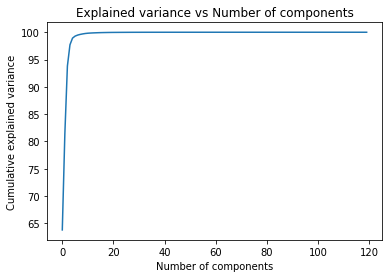

In [ ]:
# Visualizing the eigenvalues and finding the "elbow" in the graphic

sns.lineplot(x = CEV, y=cumulative_variance_explained_real)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained variance vs Number of components")

Text(0.5, 1.0, 'Explained variance vs Number of components')

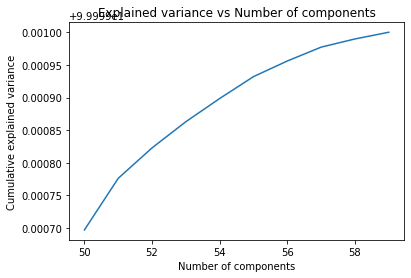

In [ ]:
# Visualizing the eigenvalues and finding the "elbow" in the graphic

sns.lineplot(x = CEV[50:60], y=cumulative_variance_explained_real[50:60])
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained variance vs Number of components")

Text(0.5, 1.0, 'Explained variance vs Number of components')

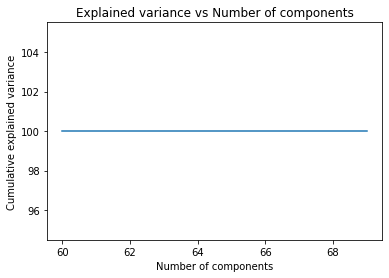

In [ ]:
# Visualizing the eigenvalues and finding the "elbow" in the graphic

sns.lineplot(x = CEV[60:70], y=cumulative_variance_explained_real[60:70])
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained variance vs Number of components")

In [ ]:
test_accuracy = list()
for num_pca in range(1,120):
    print('No of PCA : ',num_pca )
    projection_matrix = (eigen_vectors.T[:][:num_pca]).T
    print(projection_matrix)
    X_pca = X_train.dot(projection_matrix)
    print(X_pca)   #save the X_pca matrix as csv
    X_train_new = X_pca
    X_pca = X_test.dot(projection_matrix)
    print(X_pca)   #save the X_pca matrix as csv
    X_test_new = X_pca
    train_begin = time.time()
    clf = svm.SVC(kernel='linear')
    clf.fit(X_train_new.real, y_train) 
    train_end = time.time()
    train_time = train_end - train_begin
    test_begin = time.time()
    yhat = clf.predict(X_test_new.real)
    test_end = time.time()
    test_time = test_end - test_begin
    print(yhat)

    test_accuracy.append(metrics.accuracy_score(y_test, yhat))
    print(metrics.accuracy_score(y_test, yhat))
    print(confusion_matrix(y_test, yhat))
    print(classification_report(y_test, yhat))
    print(train_time)
    print(test_time)


Streaming output truncated to the last 5000 lines.
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 5 1 1 1 1 1 1 5 1 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 0
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
0.9583333333333334
[[55  0  5  0  0  0]
 [ 0 56  0  0  0  4]
 [ 3  0 57  0  0  0]
 [ 2  0  0 58  0  0]
 [ 0  0  0  0 60  0]
 [ 0  0  0  0  1 59]]
              precision    recall  f1-score   support

           0     

In [ ]:
print(max(test_accuracy))
print(test_accuracy.index(max(test_accuracy)))
# max accuracy at no_of_pca = 8

0.9972222222222222
7


In [ ]:
num_pca = 8
projection_matrix = (eigen_vectors.T[:][:num_pca]).T
print(projection_matrix)
X_pca = X_train.dot(projection_matrix)
print(X_pca)   #save the X_pca matrix as csv
X_train_new = X_pca
X_pca = X_test.dot(projection_matrix)
print(X_pca)   #save the X_pca matrix as csv
X_test_new = X_pca
train_begin = time.time()
clf = svm.SVC(kernel='linear')
clf.fit(X_train_new.real, y_train) 
train_end = time.time()
train_time = train_end - train_begin
test_begin = time.time()
yhat = clf.predict(X_test_new.real)
test_end = time.time()
test_time = test_end - test_begin
print(yhat)

test_accuracy.append(metrics.accuracy_score(y_test, yhat))
print(metrics.accuracy_score(y_test, yhat))
print(confusion_matrix(y_test, yhat))
print(classification_report(y_test, yhat))
print(train_time)
print(test_time)

[[-0.07225052+0.j -0.16445382+0.j -0.02317739+0.j -0.06213218+0.j
   0.01503761+0.j  0.01617915+0.j -0.03724396+0.j -0.01384932+0.j]
 [-0.08020781+0.j  0.02453912+0.j  0.17419796+0.j -0.04043422+0.j
   0.00914091+0.j  0.20092262+0.j -0.14578533+0.j -0.16318911+0.j]
 [ 0.10762161+0.j -0.05257709+0.j  0.04966868+0.j  0.00208736+0.j
  -0.03311639+0.j -0.16233505+0.j  0.08382625+0.j -0.00654706+0.j]
 [-0.10569472+0.j -0.02285032+0.j -0.0122856 +0.j  0.15823517+0.j
  -0.06893617+0.j  0.05310453+0.j -0.07247946+0.j  0.00416268+0.j]
 [ 0.09918922+0.j -0.0774352 +0.j  0.06608202+0.j  0.08382198+0.j
  -0.0390655 +0.j -0.15521023+0.j  0.08893947+0.j -0.01558079+0.j]
 [-0.06799352+0.j -0.17027692+0.j -0.01795906+0.j -0.07579121+0.j
   0.02802126+0.j  0.00411341+0.j -0.0147326 +0.j -0.00216821+0.j]
 [-0.07867593+0.j  0.0165706 +0.j  0.18366943+0.j -0.00791882+0.j
   0.07706974+0.j  0.0312963 +0.j -0.12525173+0.j -0.08989039+0.j]
 [ 0.10910799+0.j -0.05028231+0.j  0.03824218+0.j -0.00621219+0.j
  -

In [ ]:
# avergae precision = [1, 0.99, 1, 1, 1, 0.99]
# mean average precision = 0.9967

In [ ]:
test_accuracy = list()
for num_pca in range(1,120):
    print('No of PCA : ',num_pca )
    projection_matrix = (eigen_vectors.T[:][:num_pca]).T
    print(projection_matrix)
    X_pca = X_train.dot(projection_matrix)
    print(X_pca)   #save the X_pca matrix as csv
    X_train_new = X_pca
    X_pca = X_test.dot(projection_matrix)
    print(X_pca)   #save the X_pca matrix as csv
    X_test_new = X_pca
    clf = svm.SVC(kernel='rbf', gamma="auto")
    clf.fit(X_train.real, y_train) 
    yhat = clf.predict(X_test.real)
    print(yhat)

    print(metrics.accuracy_score(y_test, yhat))
    print(confusion_matrix(y_test, yhat))
    print(classification_report(y_test, yhat))

    test_accuracy.append(metrics.accuracy_score(y_test, yhat))
    


Streaming output truncated to the last 5000 lines.
   5.70119010e-11+0.00000000e+00j  7.19932425e-11-6.79003571e-12j]
 [ 5.16577828e+02+0.00000000e+00j -5.00653964e+02+0.00000000e+00j
   4.35939931e+02+0.00000000e+00j ... -2.59460490e+00+0.00000000e+00j
   7.48726479e-11+0.00000000e+00j  1.33679704e-10-2.94880592e-11j]
 [ 2.09697645e+02+0.00000000e+00j -1.98173268e+02+0.00000000e+00j
   1.71429805e+02+0.00000000e+00j ...  1.26734407e+00+0.00000000e+00j
  -3.03629334e-12+0.00000000e+00j  5.57268619e-11-4.13804832e-11j]]
[[ 1.76812291e+03+0.00000000e+00j -1.56026840e+03+0.00000000e+00j
   1.22951521e+03+0.00000000e+00j ...  2.94749984e-01+0.00000000e+00j
   2.12836626e-11+0.00000000e+00j  9.00325598e-11-8.95382588e-11j]
 [ 1.54592421e+03+0.00000000e+00j -1.35595849e+03+0.00000000e+00j
   1.06353380e+03+0.00000000e+00j ... -2.70077884e+00+0.00000000e+00j
   9.04496534e-11+0.00000000e+00j  8.60116513e-11-2.90000299e-11j]
 [ 1.79429525e+03+0.00000000e+00j -1.58367258e+03+0.00000000e+00j
   

In [ ]:
print(max(test_accuracy))
print(test_accuracy.index(max(test_accuracy)))

0.4166666666666667
0


In [ ]:
test_accuracy = list()
for num_pca in range(1,120):
    print('No of PCA : ',num_pca )
    projection_matrix = (eigen_vectors.T[:][:num_pca]).T
    print(projection_matrix)
    X_pca = X_train.dot(projection_matrix)
    print(X_pca)   #save the X_pca matrix as csv
    X_train_new = X_pca
    X_pca = X_test.dot(projection_matrix)
    print(X_pca)   #save the X_pca matrix as csv
    X_test_new = X_pca
    clf = svm.SVC(kernel='rbf', gamma="auto")
    clf.fit(X_train.real, y_train) 
    yhat = clf.predict(X_test.real)
    print(yhat)

    print(metrics.accuracy_score(y_test, yhat))
    print(confusion_matrix(y_test, yhat))
    print(classification_report(y_test, yhat))

    test_accuracy.append(metrics.accuracy_score(y_test, yhat))
    


Streaming output truncated to the last 5000 lines.
   5.70119010e-11+0.00000000e+00j  7.19932425e-11-6.79003571e-12j]
 [ 5.16577828e+02+0.00000000e+00j -5.00653964e+02+0.00000000e+00j
   4.35939931e+02+0.00000000e+00j ... -2.59460490e+00+0.00000000e+00j
   7.48726479e-11+0.00000000e+00j  1.33679704e-10-2.94880592e-11j]
 [ 2.09697645e+02+0.00000000e+00j -1.98173268e+02+0.00000000e+00j
   1.71429805e+02+0.00000000e+00j ...  1.26734407e+00+0.00000000e+00j
  -3.03629334e-12+0.00000000e+00j  5.57268619e-11-4.13804832e-11j]]
[[ 1.76812291e+03+0.00000000e+00j -1.56026840e+03+0.00000000e+00j
   1.22951521e+03+0.00000000e+00j ...  2.94749984e-01+0.00000000e+00j
   2.12836626e-11+0.00000000e+00j  9.00325598e-11-8.95382588e-11j]
 [ 1.54592421e+03+0.00000000e+00j -1.35595849e+03+0.00000000e+00j
   1.06353380e+03+0.00000000e+00j ... -2.70077884e+00+0.00000000e+00j
   9.04496534e-11+0.00000000e+00j  8.60116513e-11-2.90000299e-11j]
 [ 1.79429525e+03+0.00000000e+00j -1.58367258e+03+0.00000000e+00j
   

In [ ]:
print(max(test_accuracy))
print(test_accuracy.index(max(test_accuracy)))

0.4166666666666667
0


In [ ]:
for i in range(1,15) :
    poly_svc = svm.SVC(kernel='poly', degree=i).fit(X_train.real, y_train)
    yhat = poly_svc.predict(X_test.real)
    print(yhat)
    print('Degree = ',i, metrics.accuracy_score(y_test, yhat))
    # print(confusion_matrix(y_test, yhat))
    # print(classification_report(y_test, yhat))

[0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 0 2 0 2 2 2 2 2 3 2 2 2 2 2 2 3 2 2 3 0 2 2 4 2 3 2 2
 2 2 2 0 0 2 2 2 0 2 0 2 0 0 2 2 2 2 2 0 2 2 2 3 2 2 2 2 3 0 3 2 0 3 1 3 3
 3 2 3 3 2 3 1 0 3 3 3 3 3 0 1 0 3 2 3 0 1 3 1 0 3 1 3 0 3 3 3 3 0 3 3 3 2
 3 2 3 3 3 3 3 3 2 1 1 3 3 3 1 3 1 3 3 4 3 3 4 4 3 3 4 4 4 4 3 3 3 3 3 3 3
 3 3 3 4 3 4 3 3 4 4 4 4 3 3 3 4 4 4 3 4 3 3 4 3 4 4 3 3 3 3 3 3 3 3 3 3 3
 4 4 4 3 0 4 4 4 4 4 4 4 4 4 4 1 4 3 0 4 4 5 4 4 4 1 4 4 4 4 4 1 4 5 1 4 4
 4 4 4 4 4 4 0 4 1 4 4 4 4 4 4 4 4 5 4 4 4 1 4 1 4 4 4]
Degree =  1 0.6138888888888889
[0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 

In [ ]:
poly_svc = svm.SVC(kernel='poly', degree=1).fit(X_train.real, y_train)
yhat = poly_svc.predict(X_test.real)
print(yhat)
print(metrics.accuracy_score(y_test, yhat))
print(confusion_matrix(y_test, yhat))
print(classification_report(y_test, yhat))

[0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 0 2 0 2 2 2 2 2 3 2 2 2 2 2 2 3 2 2 3 0 2 2 4 2 3 2 2
 2 2 2 0 0 2 2 2 0 2 0 2 0 0 2 2 2 2 2 0 2 2 2 3 2 2 2 2 3 0 3 2 0 3 1 3 3
 3 2 3 3 2 3 1 0 3 3 3 3 3 0 1 0 3 2 3 0 1 3 1 0 3 1 3 0 3 3 3 3 0 3 3 3 2
 3 2 3 3 3 3 3 3 2 1 1 3 3 3 1 3 1 3 3 4 3 3 4 4 3 3 4 4 4 4 3 3 3 3 3 3 3
 3 3 3 4 3 4 3 3 4 4 4 4 3 3 3 4 4 4 3 4 3 3 4 3 4 4 3 3 3 3 3 3 3 3 3 3 3
 4 4 4 3 0 4 4 4 4 4 4 4 4 4 4 1 4 3 0 4 4 5 4 4 4 1 4 4 4 4 4 1 4 5 1 4 4
 4 4 4 4 4 4 0 4 1 4 4 4 4 4 4 4 4 5 4 4 4 1 4 1 4 4 4]
0.6138888888888889
[[58  0  1  0  1  0]
 [ 0 60  0  0  0  0]
 [11  0 41  7  1  0]
 [ 8 10  6 36  0  0]
 [ 0  0  0 37 23  0]
 [ 3  7  0  1 46  3]]
              precision    recall  f1-score   support

           0       0.72      0.97      0.83        60
           1  

In [ ]:
test_accuracy = list()
for num_pca in range(1,120):
    print('No of PCA : ',num_pca )
    projection_matrix = (eigen_vectors.T[:][:num_pca]).T
    print(projection_matrix)
    X_pca = X_train.dot(projection_matrix)
    print(X_pca)   #save the X_pca matrix as csv
    X_train_new = X_pca
    X_pca = X_test.dot(projection_matrix)
    print(X_pca)   #save the X_pca matrix as csv
    X_test_new = X_pca
    poly_svc = svm.SVC(kernel='poly', degree=1).fit(X_train.real, y_train)
    yhat = poly_svc.predict(X_test.real)
    print(yhat)

    print(metrics.accuracy_score(y_test, yhat))
    print(confusion_matrix(y_test, yhat))
    print(classification_report(y_test, yhat))

    test_accuracy.append(metrics.accuracy_score(y_test, yhat))
    


Streaming output truncated to the last 5000 lines.
   5.70119010e-11+0.00000000e+00j  7.19932425e-11-6.79003571e-12j]
 [ 5.16577828e+02+0.00000000e+00j -5.00653964e+02+0.00000000e+00j
   4.35939931e+02+0.00000000e+00j ... -2.59460490e+00+0.00000000e+00j
   7.48726479e-11+0.00000000e+00j  1.33679704e-10-2.94880592e-11j]
 [ 2.09697645e+02+0.00000000e+00j -1.98173268e+02+0.00000000e+00j
   1.71429805e+02+0.00000000e+00j ...  1.26734407e+00+0.00000000e+00j
  -3.03629334e-12+0.00000000e+00j  5.57268619e-11-4.13804832e-11j]]
[[ 1.76812291e+03+0.00000000e+00j -1.56026840e+03+0.00000000e+00j
   1.22951521e+03+0.00000000e+00j ...  2.94749984e-01+0.00000000e+00j
   2.12836626e-11+0.00000000e+00j  9.00325598e-11-8.95382588e-11j]
 [ 1.54592421e+03+0.00000000e+00j -1.35595849e+03+0.00000000e+00j
   1.06353380e+03+0.00000000e+00j ... -2.70077884e+00+0.00000000e+00j
   9.04496534e-11+0.00000000e+00j  8.60116513e-11-2.90000299e-11j]
 [ 1.79429525e+03+0.00000000e+00j -1.58367258e+03+0.00000000e+00j
   

In [ ]:
print(max(test_accuracy))
print(test_accuracy.index(max(test_accuracy)))

0.6222222222222222
0
